In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df_train=pd.read_csv('list_of_character.csv')
df_train


,Name,type_of_creature,gender,devil_fruit_user,rank,number of hands,Type_of_devil_fruit,swordsman,hair_color,Worst Generation,parent
0,Pacifist,Cyborg,none,no,marine,2,no,no,black,no,no
1,Chick,animal,none,no,none,0,no,no,no,no,no
2,Whale,animal,male,no,none,0,no,no,no,no,no
3,Hattian,human,female,no,outlaw,2,no,no,brown,no,no
4,Arlong,fishman,male,no,pirate,2,no,no,black,no,no
5,Crocodile,human,male,yes,warlord,2,logia,no,black,no,no
6,Kizaru,human,male,yes,admiral,2,logia,no,black,no,no
7,Aokoji,human,male,yes,admiral,2,logia,no,black,no,no
8,Brooke,human,male,yes,pirate,2,paramecia,no,black,no,no
9,Shanks,human,male,no,yonko,1,no,yes,red,no,no


In [9]:
for column in df_train.select_dtypes(include='int').columns:
    df_train[column] = df_train[column].astype(str)
df_train['number of hands'] = df_train['number of hands'].astype(int)

In [10]:
print(df_train.info())
target_column=df_train['Name']
target_column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Name                 30 non-null     object
 1   type_of_creature     30 non-null     object
 2   gender               30 non-null     object
 3   devil_fruit_user     30 non-null     object
 4   rank                 30 non-null     object
 5   number of hands      30 non-null     int32 
 6   Type_of_devil_fruit  30 non-null     object
 7   swordsman            30 non-null     object
 8   hair_color           30 non-null     object
 9   Worst Generation     30 non-null     object
 10  parent               30 non-null     object
dtypes: int32(1), object(10)
memory usage: 2.6+ KB
None


0            Pacifist
1               Chick
2               Whale
3             Hattian
4              Arlong
5           Crocodile
6              Kizaru
7              Aokoji
8              Brooke
9              Shanks
10            Hancock
11              Teach
12               Vivi
13    Nefertari Cobra
14             Dragon
15             Mihawk
16               Garp
17               Kuma
18               Sabo
19            Ivankov
20              Marco
21             Bonnie
22             Reilly
23             Killer
24           X Drake 
25               Aruj
26            Hawkins
27                Kid
28               Back
29               Pell
Name: Name, dtype: object

In [11]:
categorical_columns = df_train.select_dtypes(include=['object'])
df_train[categorical_columns.columns] = df_train[categorical_columns.columns].fillna(df_train[categorical_columns.columns].mode().iloc[0])
categorical_columns
#

,Name,type_of_creature,gender,devil_fruit_user,rank,Type_of_devil_fruit,swordsman,hair_color,Worst Generation,parent
0,Pacifist,Cyborg,none,no,marine,no,no,black,no,no
1,Chick,animal,none,no,none,no,no,no,no,no
2,Whale,animal,male,no,none,no,no,no,no,no
3,Hattian,human,female,no,outlaw,no,no,brown,no,no
4,Arlong,fishman,male,no,pirate,no,no,black,no,no
5,Crocodile,human,male,yes,warlord,logia,no,black,no,no
6,Kizaru,human,male,yes,admiral,logia,no,black,no,no
7,Aokoji,human,male,yes,admiral,logia,no,black,no,no
8,Brooke,human,male,yes,pirate,paramecia,no,black,no,no
9,Shanks,human,male,no,yonko,no,yes,red,no,no


In [12]:
df_train_encoded = pd.get_dummies(df_train, columns=categorical_columns.columns)
df_train_encoded

,number of hands,Name_Aokoji,Name_Arlong,Name_Aruj,Name_Back,Name_Bonnie,Name_Brooke,Name_Chick,Name_Crocodile,Name_Dragon,...,hair_color_no,hair_color_pink,hair_color_red,hair_color_violet,hair_color_white,hair_color_yellow,Worst Generation_no,Worst Generation_yes,parent _no,parent _yes
0,2,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,True,False
1,0,False,False,False,False,False,False,True,False,False,...,True,False,False,False,False,False,True,False,True,False
2,0,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,True,False,True,False
3,2,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,True,False
4,2,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,True,False
5,2,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,True,False,True,False
6,2,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,True,False
7,2,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,True,False
8,2,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,True,False,True,False
9,1,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,True,False,True,False


In [13]:
df_train_encoded = df_train_encoded.applymap(lambda x: 1 if x else 0)

# Выводим результат
print(df_train_encoded)

    number of hands  Name_Aokoji  Name_Arlong  Name_Aruj  Name_Back  \
0                 1            0            0          0          0   
1                 0            0            0          0          0   
2                 0            0            0          0          0   
3                 1            0            0          0          0   
4                 1            0            1          0          0   
5                 1            0            0          0          0   
6                 1            0            0          0          0   
7                 1            1            0          0          0   
8                 1            0            0          0          0   
9                 1            0            0          0          0   
10                1            0            0          0          0   
11                1            0            0          0          0   
12                1            0            0          0          0   
13    

C:\Users\Prokrastinator\AppData\Local\Temp\ipykernel_22492\2649022003.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_train_encoded = df_train_encoded.applymap(lambda x: 1 if x else 0)


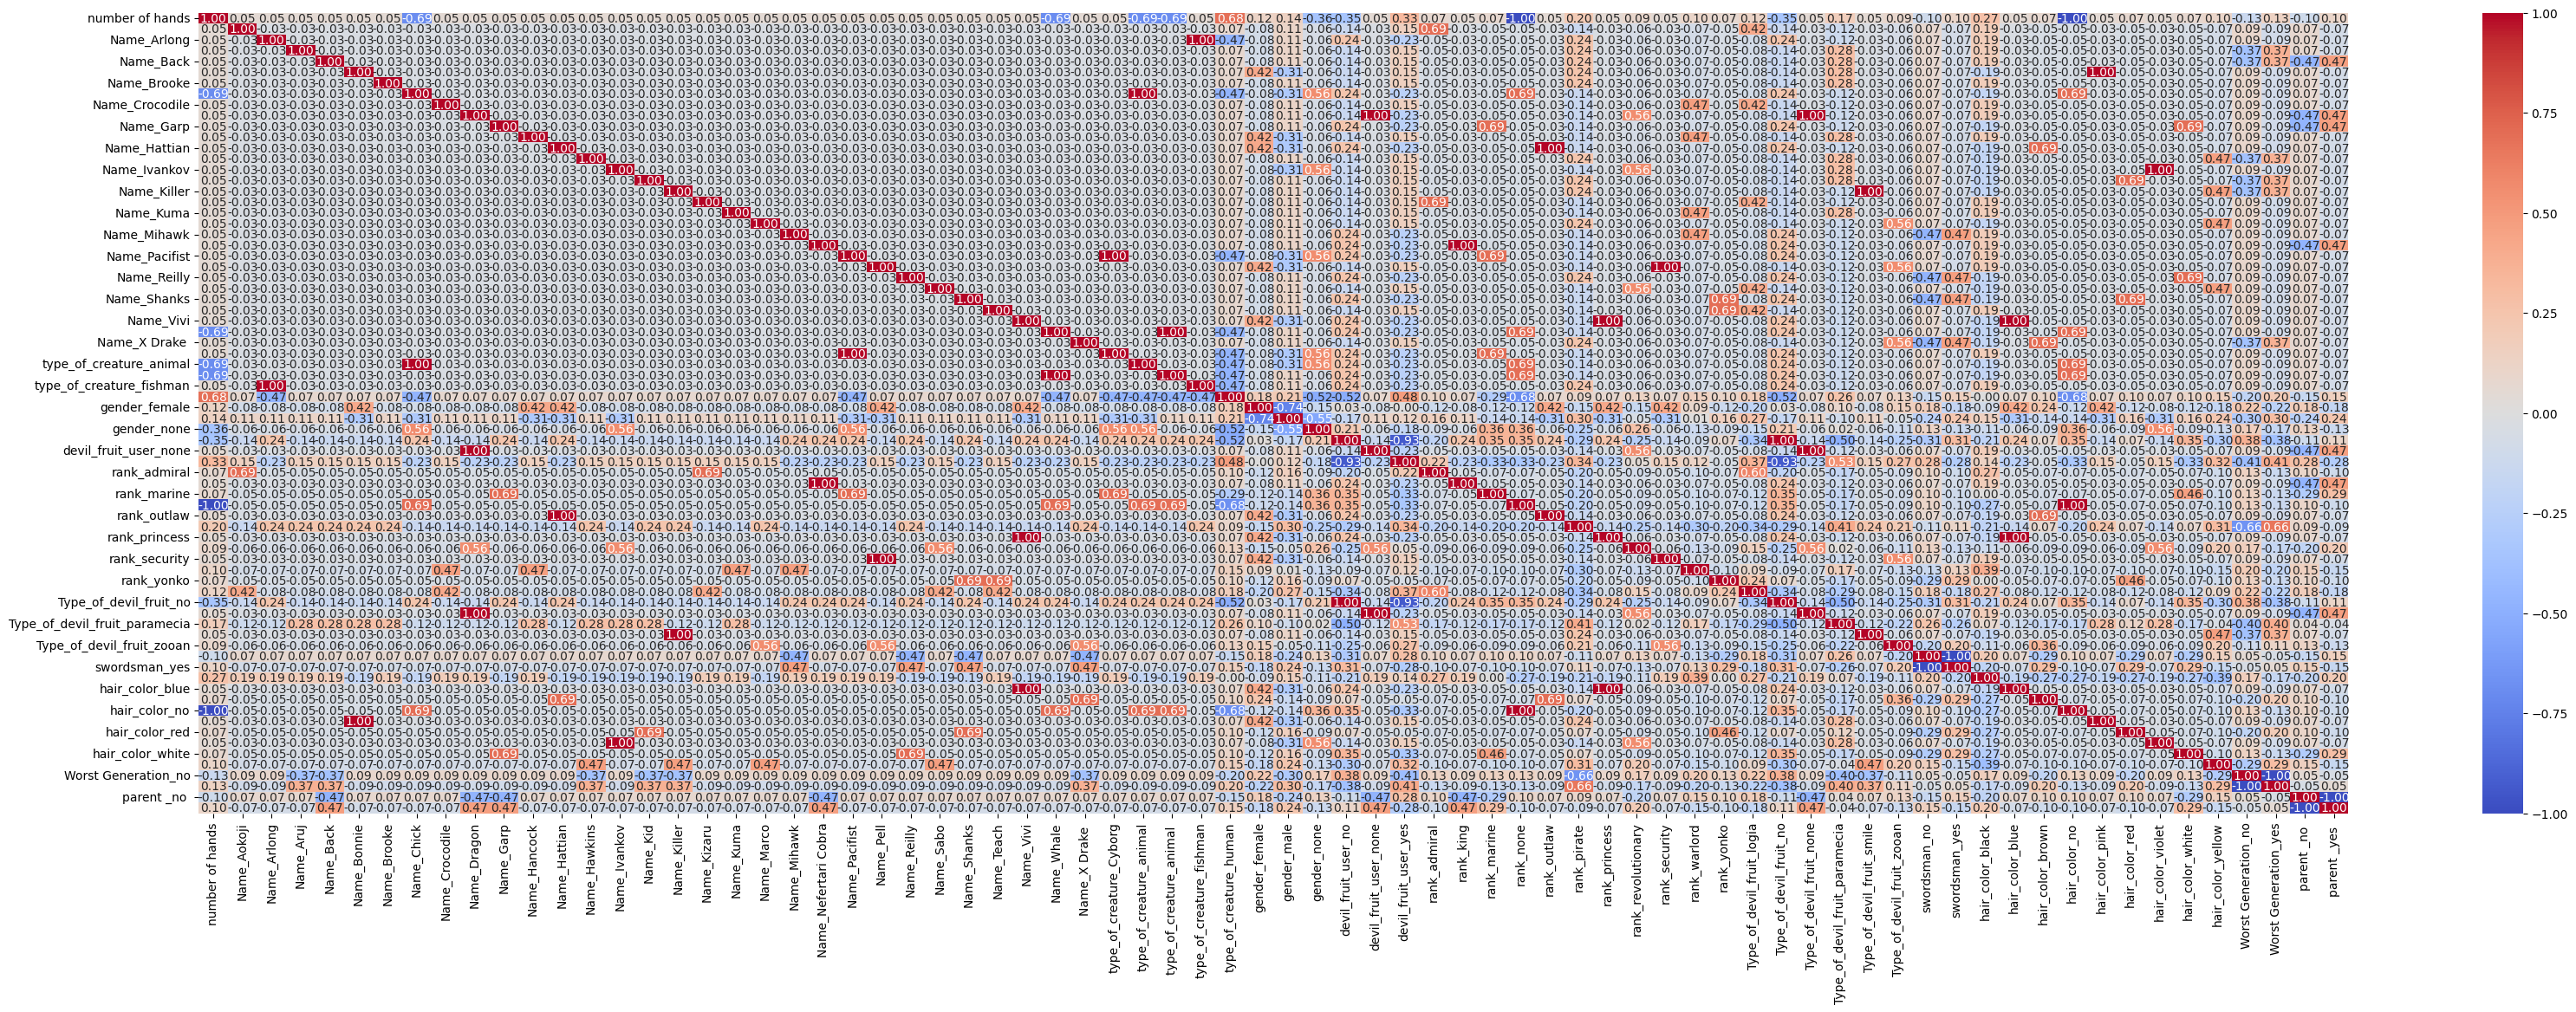

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df_train_encoded.corr()

plt.figure(figsize=(40, 12))

# Create a heatmap using Seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Display the heatmap
plt.show()

In [15]:
df_train_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 74 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   number of hands                30 non-null     int64
 1   Name_Aokoji                    30 non-null     int64
 2   Name_Arlong                    30 non-null     int64
 3   Name_Aruj                      30 non-null     int64
 4   Name_Back                      30 non-null     int64
 5   Name_Bonnie                    30 non-null     int64
 6   Name_Brooke                    30 non-null     int64
 7   Name_Chick                     30 non-null     int64
 8   Name_Crocodile                 30 non-null     int64
 9   Name_Dragon                    30 non-null     int64
 10  Name_Garp                      30 non-null     int64
 11  Name_Hancock                   30 non-null     int64
 12  Name_Hattian                   30 non-null     int64
 13  Name_Hawkins          

In [16]:
df_train_encoded

,number of hands,Name_Aokoji,Name_Arlong,Name_Aruj,Name_Back,Name_Bonnie,Name_Brooke,Name_Chick,Name_Crocodile,Name_Dragon,...,hair_color_no,hair_color_pink,hair_color_red,hair_color_violet,hair_color_white,hair_color_yellow,Worst Generation_no,Worst Generation_yes,parent _no,parent _yes
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,1,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,1,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
4,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
5,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
6,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
7,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
8,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
9,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,1,0


In [17]:
def try_pred(df,question,ans):
    correlations = df.corr()[f'{question}'].sort_values(ascending=False) 
    new_df=df
    columns_with_low_corr=[]
    for col, corr_value in correlations.items():
        if(ans==1):
            if corr_value <= 0:
                 columns_with_low_corr.append(col)
        elif ans==0:
            if corr_value >= 0:
                 columns_with_low_corr.append(col)
    for column_name in columns_with_low_corr:
        new_df = new_df.drop(column_name, axis=1)       
    return new_df    

In [18]:
def calculate_gini_index(data, column, value):
    # Разделение данных на две группы: те, у которых значение в столбце column равно value, и те, у которых оно не равно.
    group1 = data[data[column] == value]
    group2 = data[data[column] != value]

    # Вычисление вероятности принадлежности к каждой группе
    p1 = len(group1) / len(data)
    p2 = len(group2) / len(data)

    # Вычисление Gini для каждой группы
    gini1 = 1 - sum((group1['target_column'].value_counts() / len(group1)) ** 2)
    gini2 = 1 - sum((group2['target_column'].value_counts() / len(group2)) ** 2)

    # Вычисление взвешенного среднего Gini
    gini_index = p1 * gini1 + p2 * gini2

    return gini_index

def find_best_question(data, current_questions):
    best_gini_index = float('inf')
    best_question = None

    for question in current_questions:
        for value in [0, 1]:  # Здесь предполагается бинарный вопрос (yes=1, no=0)
            gini_index = calculate_gini_index(data, question, value)

            if gini_index < best_gini_index:
                best_gini_index = gini_index
                best_question = (question, value)

    return best_question

# Ваш код с использованием новой функции find_best_question


In [21]:
import random

def calculate_gini_index(data, column, value, target_column):
    # Разделение данных на две группы: те, у которых значение в столбце column равно value, и те, у которых оно не равно.
    group1 = data[data[column] == value]
    group2 = data[data[column] != value]

    # Вычисление вероятности принадлежности к каждой группе
    p1 = len(group1) / len(data)
    p2 = len(group2) / len(data)

    # Вычисление Gini для каждой группы
    gini1 = 1 - sum((group1[target_column].value_counts() / len(group1)) ** 2)
    gini2 = 1 - sum((group2[target_column].value_counts() / len(group2)) ** 2)

    # Вычисление взвешенного среднего Gini
    gini_index = p1 * gini1 + p2 * gini2

    return gini_index

def find_best_question(data, current_questions, target_column):
    best_gini_index = float('inf')
    best_question = None

    for question in current_questions:
        for value in [0, 1]:  # Здесь предполагается бинарный вопрос (yes=1, no=0)
            gini_index = calculate_gini_index(data, question, value, target_column)

            if gini_index < best_gini_index:
                best_gini_index = gini_index
                best_question = (question, value)

    return best_question

while True:
    dh_ts = df_train_encoded
    asked_questions = ['type_of_creature_human']
    play_game = input("Do you want to play a game? (yes/no): ").lower()
    
    if play_game == 'yes':
        i = 0
        while True:
            filtered_columns = dh_ts.filter(regex='Name', axis=1)
            size = filtered_columns.shape[1]
            
            if size == 1:
                print(filtered_columns.columns[0])
                asked_questions.clear()
                del filtered_columns
                del dh_ts
                break
            else:
                target_column=asked_questions.pop(i)
                best_question, value = find_best_question(dh_ts, asked_questions, target_column)
                ans = float(input(f"Enter {best_question} yes=1, no=0 : "))
                dh_ts = try_pred(dh_ts, best_question, value)
                all_columns = dh_ts.columns.tolist()
                remaining_questions = [q for q in dh_ts.columns.tolist() if q not in asked_questions]

                if not remaining_questions:
                    print("No more questions to ask. Game over.")
                    break
                asked_questions.append(best_question)
                i += 1
    elif play_game == 'no':
        print("Maybe next time. Goodbye!")
        break
    else:
        print("Please check the entered data and answer yes or no")


TypeError: cannot unpack non-iterable NoneType object

In [23]:
import random

while True:
    dh_ts = df_train_encoded
    asked_questions = ['type_of_creature_human']
    play_game = input("Do you want to play a game? (yes/no): ").lower()
    if play_game == 'yes':
        i = 0
        while True:
                filtered_columns = dh_ts.filter(regex='Name', axis=1)
                size = filtered_columns.shape[1]
                if size == 1:
                        print(filtered_columns.columns[0])
                        asked_questions.clear()
                        del filtered_columns
                        del dh_ts
                        break
                else:
                        ans = float(input(f"Enter {asked_questions[i]} yes=1, no=0 : "))
                        dh_ts = try_pred(dh_ts, asked_questions[i], ans)
                        all_columns = dh_ts.columns.tolist()
                        remaining_questions = [q for q in dh_ts.columns.tolist() if q not in asked_questions]

                        if not remaining_questions:
                                print("No more questions to ask. Game over.")
                                break

                        random_question = random.choice(remaining_questions)
                        asked_questions.append(random_question)
                        i += 1
    elif(play_game=='no'):
        print("Maybe next time. Goodbye!")
        break
    else:
        print("Please check the entered data and answer yes or no")



Name_Bonnie
Name_Chick
Name_Mihawk
Name_Shanks
Name_X Drake 
Maybe next time. Goodbye!


In [ ]:
import tkinter as tk
from tkinter import messagebox
import random



class GameApp:
    def __init__(self, root):
        self.root = root
        self.root.title("Creature Guessing Game")

        self.play_game_label = tk.Label(root, text="Do you want to play a game? (yes/no):")
        self.play_game_label.pack()

        self.play_game_entry = tk.Entry(root)
        self.play_game_entry.pack()

        self.play_button = tk.Button(root, text="Play", command=self.play_game)
        self.play_button.pack()

        self.result_label = tk.Label(root, text="")
        self.result_label.pack()

        self.asked_questions = ['type_of_creature_human']
        self.dh_ts = None

    def play_game(self):
        play_game = self.play_game_entry.get().lower()

        if play_game == 'yes':
            if self.dh_ts is None:
                # Инициализация dh_ts при первой игре
                self.dh_ts = df_train_encoded
                asked_questions=['type_of_creature_human']
            i = 0
            while True:
                filtered_columns = self.dh_ts.filter(regex='Name', axis=1)
                size = filtered_columns.shape[1]

                if size == 1:
                    result = f"The creature is: {filtered_columns.columns[0]}"
                    messagebox.showinfo("Game Over", result)
                    self.asked_questions.clear()
                    self.dh_ts = None
                    break
                else:
                    ans = float(self.ask_question(f"Enter {self.asked_questions[i]} yes=1, no=0 : "))
                    self.dh_ts = try_pred(self.dh_ts, self.asked_questions[i], ans)
                    all_columns = self.dh_ts.columns.tolist()
                    remaining_questions = [q for q in self.dh_ts.columns.tolist() if q not in self.asked_questions]

                    if not remaining_questions:
                        result = "No more questions to ask. Game over."
                        messagebox.showinfo("Game Over", result)
                        break

                    random_question = random.choice(remaining_questions)
                    self.asked_questions.append(random_question)
                    i += 1
        elif play_game == 'no':
            result = "Maybe next time. Goodbye!"
            messagebox.showinfo("Game Over", result)
            self.root.destroy()
        else:
            messagebox.showwarning("Invalid Input", "Please check the entered data and answer yes or no")

    def ask_question(self, question):
        # Диалоговое окно для ввода ответа
        return simpledialog.askfloat("Question", question)

if __name__ == "__main__":
    root = tk.Tk()
    app = GameApp(root)
    root.mainloop()


In [ ]:
import tkinter as tk
from PIL import Image, ImageTk

def set_yes():
    global play_game
    play_game = 'yes'

def set_no():
    global play_game
    play_game = 'no'

root = tk.Tk()
root.title('Tapkish')
root.geometry("300x200")  # Adjust the width as needed

image = Image.open(r"C:/Users/Prokrastinator/Desktop/projectML/others/2023-12-24_11-43-40.png")

play_game_label = tk.Label(root, text="Do you want to play a game? (yes/no):")
play_game_label.pack()

button_frame = tk.Frame(root)
button_frame.pack()

button_yes = tk.Button(button_frame, text="yes", command=set_yes)
button_yes.pack(side=tk.LEFT, padx=5)  # Added some padding for better spacing

button_no = tk.Button(button_frame, text="no", command=set_no)
button_no.pack(side=tk.LEFT, padx=5)  # Added some padding for better spacing

root.mainloop()


In [ ]:
import tkinter as tk
from PIL import Image, ImageTk
import random

def set_ans(ans):
    ans = float(ans)

def get_ans():
    return ans;

def play_game_function(play_game):
    dh_ts = df_train_encoded
    asked_questions = ['type_of_creature_human']
    z=1
    if play_game == 'yes':
        
        i = 0
        while True:
            filtered_columns = dh_ts.filter(regex='Name', axis=1)
            size = filtered_columns.shape[1]

            if size == 1:
                result_label.config(text=filtered_columns.columns[0])
                asked_questions.clear()
                play_game_label.config(text='Do you want to play a game? (yes/no):')

                del filtered_columns
                del dh_ts
                button_frame.pack()

                break
            else:
                play_game_label.config(text=f"Enter {asked_questions[i]} yes=1, no=0 : ")
                
                entry_frame = tk.Frame(root)
                entry_frame.pack()
                entry = tk.Entry(entry_frame)
                entry.pack(side=tk.LEFT)
                button_input = tk.Button(button_frame, text="set", command=setans(entry))
                button_input.pack(side=tk.LEFT, padx=5)  
                def setans(entry):
                    ans=float(entry.get())
                    
                
                entry.delete(0, tk.END)  # Clear the entry widget for the next input

                
                dh_ts = try_pred(dh_ts, asked_questions[i], ans)
                all_columns = dh_ts.columns.tolist()
                remaining_questions = [q for q in dh_ts.columns.tolist() if q not in asked_questions]
                if not remaining_questions:
                    result_label.config(text="No more questions to ask. Game over.")
                    break
                random_question = random.choice(remaining_questions)
                asked_questions.append(random_question)
                i += 1
    elif play_game == 'no':
        play_game_label.config(text='Do you want to play a game? (yes/no):')
        result_label.config(text="Maybe next time. Goodbye!")
        button_frame.pack()


def set_yes():
    play_game_function('yes')
    button_frame.pack_forget()



def set_no():
    play_game_function('no')
    button_frame.pack_forget()

root = tk.Tk()
root.title('Tapkish')
root.geometry("500x700")  # Adjusted the height for better display

image = Image.open(r"C:/Users/Prokrastinator/Desktop/projectML/others/2023-12-24_11-43-40.png")
akin1 = ImageTk.PhotoImage(image)

image_label = tk.Label(root, image=akin1)
image_label.image = akin1
image_label.pack()

play_game_label = tk.Label(root, text="Do you want to play a game? (yes/no):")
play_game_label.pack()

button_frame = tk.Frame(root)
button_frame.pack()

button_yes = tk.Button(button_frame, text="yes", command=set_yes)
button_yes.pack(side=tk.LEFT, padx=5)  # Added some padding for better spacing

button_no = tk.Button(button_frame, text="no", command=set_no)
button_no.pack(side=tk.LEFT, padx=5)  # Added some padding for better spacing

result_label = tk.Label(root, text="")
result_label.pack()

root.mainloop()


Exception in Tkinter callback
Traceback (most recent call last):
  File "c:\Python311\Lib\tkinter\__init__.py", line 1948, in __call__
    return self.func(*args)
           ^^^^^^^^^^^^^^^^
  File "C:\Users\Prokrastinator\AppData\Local\Temp\ipykernel_13516\2873799415.py", line 64, in set_yes
    play_game_function('yes')
  File "C:\Users\Prokrastinator\AppData\Local\Temp\ipykernel_13516\2873799415.py", line 39, in play_game_function
    button_input = tk.Button(button_frame, text="set", command=setans(entry))
                                                               ^^^^^^
UnboundLocalError: cannot access local variable 'setans' where it is not associated with a value


In [ ]:
import tkinter as tk
from PIL import Image, ImageTk
import random

def set_ans(entry, dh_ts, asked_questions, i):
    ans = float(entry.get())
    entry.delete(0, tk.END)  # Clear the entry widget for the next input
    dh_ts = try_pred(dh_ts, asked_questions[i], ans)
    all_columns = dh_ts.columns.tolist()
    remaining_questions = [q for q in dh_ts.columns.tolist() if q not in asked_questions]
    
    if not remaining_questions:
        result_label.config(text="No more questions to ask. Game over.")
        entry_frame.pack_forget()
        button_frame.pack()
    else:
        random_question = random.choice(remaining_questions)
        asked_questions.append(random_question)
        play_game_label.config(text=f"Enter {asked_questions[i]} yes=1, no=0 : ")
        

def play_game_function(play_game):
    dh_ts = df_train_encoded
    asked_questions = ['type_of_creature_human']
    
    if play_game == 'yes':
        i = 0
        while True:
            filtered_columns = dh_ts.filter(regex='Name', axis=1)
            size = filtered_columns.shape[1]

            if size == 1:
                result_label.config(text=filtered_columns.columns[0])
                asked_questions.clear()
                play_game_label.config(text='Do you want to play a game? (yes/no):')
                button_frame.pack()
                entry_frame.pack_forget()
                break
            else:
                play_game_label.config(text=f"Enter {asked_questions[i]} yes=1, no=0 : ")
                
                entry_frame = tk.Frame(root)
                entry_frame.pack()
                entry = tk.Entry(entry_frame)
                entry.pack(side=tk.LEFT)
                
                button_input = tk.Button(button_frame, text="set", command=lambda: set_ans(entry, dh_ts, asked_questions, i))
                button_input.pack(side=tk.LEFT, padx=5)  

                def set_ans(entry, dh_ts, asked_questions, i):
                    ans = float(entry.get())
                    entry.delete(0, tk.END)  # Очистим виджет ввода для следующего ввода
                    dh_ts = try_pred(dh_ts, asked_questions[i], ans)
                    all_columns = dh_ts.columns.tolist()
                    remaining_questions = [q for q in dh_ts.columns.tolist() if q not in asked_questions]
                    
                    if not remaining_questions:
                                        result_label.config(text="No more questions to ask. Game over.")
                                        entry_frame.pack_forget()
                                        button_frame.pack()
                    else:
                                        random_question = random.choice(remaining_questions)
                                        asked_questions.append(random_question)
                                        play_game_label.config(text=f"Enter {asked_questions[i]} yes=1, no=0 : ")

    elif play_game == 'no':
        play_game_label.config(text='Do you want to play a game? (yes/no):')
        result_label.config(text="Maybe next time. Goodbye!")
        button_frame.pack()
        entry_frame.pack_forget()


def set_yes():
    play_game_function('yes')


def set_no():
    play_game_function('no')

root = tk.Tk()
root.title('Tapkish')
root.geometry("500x700")  

image = Image.open(r"C:/Users/Prokrastinator/Desktop/projectML/others/2023-12-24_11-43-40.png")
akin1 = ImageTk.PhotoImage(image)

image_label = tk.Label(root, image=akin1)
image_label.image = akin1
image_label.pack()

play_game_label = tk.Label(root, text="Do you want to play a game? (yes/no):")
play_game_label.pack()

button_frame = tk.Frame(root)
button_frame.pack()

button_yes = tk.Button(button_frame, text="yes", command=set_yes)
button_yes.pack(side=tk.LEFT, padx=5)  

button_no = tk.Button(button_frame, text="no", command=set_no)
button_no.pack(side=tk.LEFT, padx=5)  

result_label = tk.Label(root, text="")
result_label.pack()

root.mainloop()
